In [4]:
# -------------------------------------------------------------------------------------
# Third party imports
# -------------------------------------------------------------------------------------
import numpy as np 
import matplotlib.pyplot as plt
import os, sys
import glob 

import astropy
from astropy.io import fits
from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth
from ccdproc import Combiner
from ccdproc import wcs_project
from astropy.nddata import CCDData

import importlib

# -------------------------------------------------------------------------------------
# Local imports
# -------------------------------------------------------------------------------------
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import downloader 
import refcat
import imagehandler

importlib.reload(downloader)
importlib.reload(refcat)
importlib.reload(imagehandler)

<module 'imagehandler' from '/home/mikea/GitHub/shifty/shifty/imagehandler.py'>

In [205]:
filename = '../dev_data/2015RS281_HSC20160826_117.fits'
extno=0

In [206]:
with fits.open(filename) as han:
            data = han[extno].data
            header = han[extno].header  # Header for the extension
            header0 = han[0].header  # Overall header for mosaic, ext0
        

In [207]:
O=imagehandler.OneImage

In [208]:
o=O(filename)

In [209]:
o.data

array([[ 1.4440657e+04,  1.3562630e+04,  1.2861006e+04, ...,
         2.6882830e+04,  2.6882830e+04,  2.6882830e+04],
       [ 1.4440657e+04,  1.3562630e+04,  1.2861006e+04, ...,
         2.6882830e+04,  2.6882830e+04,  2.6882830e+04],
       [ 1.4440657e+04,  1.3562630e+04,  1.2861006e+04, ...,
         2.6882830e+04,  2.6882830e+04,  2.6882830e+04],
       ...,
       [-4.4729075e+00,  2.4267336e+01,  6.8557601e+00, ...,
         7.5015533e+01,  7.5015533e+01,  7.5015533e+01],
       [-3.5645054e+01, -1.0841467e+01, -2.4285862e+01, ...,
         3.7719433e+01,  3.7719433e+01,  3.7719433e+01],
       [-1.4335373e+01,  2.0109072e+00,  3.1635023e+01, ...,
         2.6642099e+01,  2.6642099e+01,  2.6642099e+01]], dtype=float32)

In [242]:
filenames=[filename.replace('117', str(i)) for i in np.arange(100, 124)]
filenames[:12]=[filenamei.replace('0826', '0825') for filenamei in filenames[:12]]

In [243]:
E=imagehandler.ImageEnsemble(filenames,extno)

Set DATE-END to '2016-08-26T08:53:19.532' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T09:16:04.437' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T09:51:50.168' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T10:26:07.091' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T11:00:43.152' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T11:35:41.172' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T12:11:00.106' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T12:47:04.374' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T13:23:32.756' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T13:59:15.831' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T14:34:08.318' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T15:10:10.805' from MJD-END'. [astropy.wcs.wcs]


In [356]:
from matplotlib.colors import LogNorm

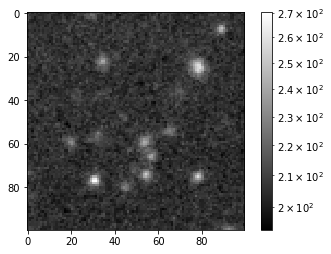

In [357]:
plt.imshow((E.data.mean(0)-E.data.mean(0).min())[230:330,100:200].T, cmap='gray',norm=LogNorm())
cbar = plt.colorbar()

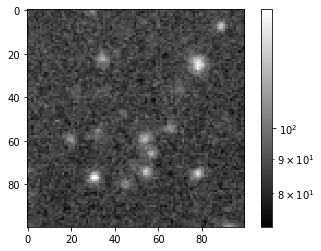

In [358]:
plt.imshow((np.median(E.data, 0)-np.median(E.data,0).min())[230:330,100:200].T, cmap='gray',norm=LogNorm())
cbar = plt.colorbar()

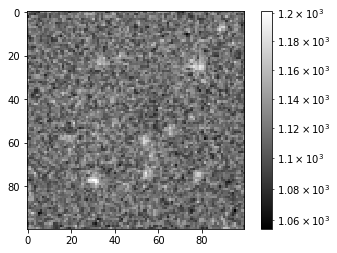

In [360]:
plt.imshow((E.data[23]-E.data[23].min())[230:330,100:200].T, cmap='gray',norm=LogNorm())
cbar = plt.colorbar()

Man, these 12 images are well aligned. Even without using the WCS, straight stacking results in much clearer image.

In [361]:
from ccdproc import Combiner
from ccdproc import wcs_project
from astropy.nddata import CCDData

In [363]:
E.WCS[0]

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 10.6435366950531  6.62817922966706  
CRPIX : 1017.91674947307  -4709.19245648854  
CD1_1 CD1_2  : 3.80003850351144e-08  -4.69006312692491e-05  
CD2_1 CD2_2  : -4.68851243302692e-05  -1.76526304747514e-08  
NAXIS : 2048  4176

In [364]:
from astropy.nddata import CCDData
dat = CCDData(E.data[1], wcs=E.WCS[1], unit='adu')

In [365]:
reprojected_image=wcs_project(dat, E.WCS[0])

In [276]:
reprojected = []
for i, img in enumerate(E.data):
    new_img = wcs_project(CCDData(img, wcs=E.WCS[i], unit='adu'), E.WCS[0])
    reprojected.append(new_img)

In [630]:
from ccdproc import Combiner
combiner = Combiner(reprojected)
stacked_image = combiner.average_combine()

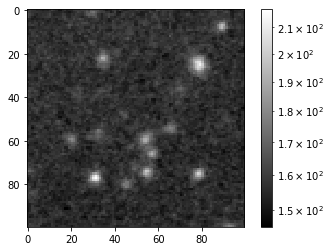

In [631]:
plt.imshow((stacked_image.data-stacked_image.data.min())[230:330,100:200].T, cmap='gray',norm=LogNorm())
cbar = plt.colorbar()

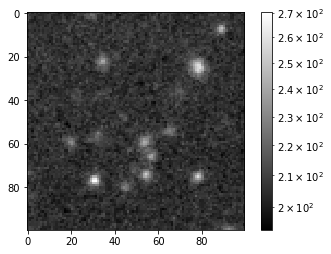

In [632]:
plt.imshow((E.data.mean(0)-E.data.mean(0).min())[230:330,100:200].T, cmap='gray',norm=LogNorm())
cbar = plt.colorbar()

In [633]:
res=stacked_image.data-E.data.mean(0)

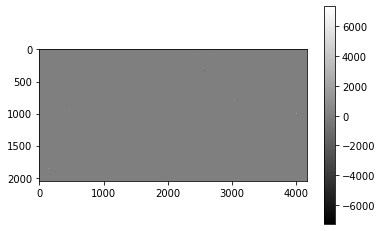

In [634]:
plt.imshow(res.T, cmap='gray')
cbar = plt.colorbar()

In [635]:
outfile='test2.fits'
hdu = fits.PrimaryHDU(stacked_image.data)
hdu.writeto(outfile, overwrite=True)

In [291]:
reprojected_image=wcs_project(dat, E.WCS[0], order='bilinear', target_shape=(5000,5000))

In [292]:
np.shape(reprojected_image)

(5000, 5000)

In [305]:
help(E.WCS[0])

Help on WCS in module astropy.wcs.wcs object:

class WCS(astropy.wcs.wcsapi.fitswcs.FITSWCSAPIMixin, astropy.wcs.WCSBase)
 |  WCS(header=None, fobj=None, key=' ', minerr=0.0, relax=True, naxis=None, keysel=None, colsel=None, fix=True, translate_units='', _do_set=True)
 |  
 |  WCS objects perform standard WCS transformations, and correct for
 |  `SIP`_ and `distortion paper`_ table-lookup transformations, based
 |  on the WCS keywords and supplementary data read from a FITS file.
 |  
 |  See also: http://docs.astropy.org/en/stable/wcs/
 |  
 |  Parameters
 |  ----------
 |  header : astropy.io.fits header object, Primary HDU, Image HDU, string, dict-like, or None, optional
 |      If *header* is not provided or None, the object will be
 |      initialized to default values.
 |  
 |  fobj : An astropy.io.fits file (hdulist) object, optional
 |      It is needed when header keywords point to a `distortion
 |      paper`_ lookup table stored in a different extension.
 |  
 |  key : str, 

In [320]:
E.WCS[0].all_pix2world([1,2,3], [1,1,1], 1)

[array([10.42161483, 10.42161484, 10.42161485]),
 array([6.67561363, 6.67556687, 6.67552012])]

In [333]:
help(E.WCS[1].wcs)

Help on Wcsprm object:

class Wcsprm(builtins.object)
 |  Wcsprm(header=None, key=' ', relax=False, naxis=2, keysel=0, colsel=None)
 |  
 |  `~astropy.wcs.Wcsprm` performs the core WCS transformations.
 |  
 |  .. note::
 |      The members of this object correspond roughly to the key/value
 |      pairs in the FITS header.  However, they are adjusted and
 |      normalized in a number of ways that make performing the WCS
 |      transformation easier.  Therefore, they can not be relied upon to
 |      get the original values in the header.  For that, use
 |      `astropy.io.fits.Header` directly.
 |  
 |  The FITS header parsing enforces correct FITS "keyword = value" syntax
 |  with regard to the equals sign occurring in columns 9 and 10.
 |  However, it does recognize free-format character (NOST 100-2.0,
 |  Sect. 5.2.1), integer (Sect. 5.2.3), and floating-point values
 |  (Sect. 5.2.4) for all keywords.
 |  
 |  Parameters
 |  ----------
 |  header : An `astropy.io.fits.Header`, s

In [345]:
E.WCS[1].wcs.crpix=(100,100)

In [346]:
E.WCS[1]

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 10.6435223828162  6.62820163418237  
CRPIX : 100.0  100.0  
CD1_1 CD1_2  : 3.29313377544726e-08  -4.68909124813264e-05  
CD2_1 CD2_2  : -4.68840121699666e-05  -1.74323665394154e-08  
NAXIS : 2048  4176

In [395]:
dat = CCDData(E.data[1], wcs=E.WCS[1], unit='adu', header=o.header)

In [417]:
a=[[1,2],[3,4],[5,6]]

In [403]:
np.shape(a)

(3, 2)

In [404]:
a[0]

(1, 2)

In [406]:
b=np.array(a)

In [407]:
b[0]

array([1, 2])

In [452]:
c=np.array([[1.5,2.5],[3.5,4.5],[5.5,6.5]])

In [453]:
c.round(0).astype(int)

array([[2, 2],
       [4, 4],
       [6, 6]])

In [443]:
c.round.astype(int)

AttributeError: 'builtin_function_or_method' object has no attribute 'astype'

In [546]:
data=E.data[:3,:4,:3]

In [547]:
data

array([[[34814.188 , 34446.414 , 34474.176 ],
        [22891.848 , 24508.006 , 26601.146 ],
        [12464.716 , 11514.136 , 11409.22  ],
        [ 9449.978 ,  7912.7344,  7682.9453]],

       [[24327.473 , 25522.98  , 24006.71  ],
        [13439.534 , 13213.104 , 11930.985 ],
        [ 8969.731 ,  8007.564 ,  6885.3613],
        [ 7275.2344,  6204.408 ,  5187.4004]],

       [[13705.665 , 12901.138 , 12179.019 ],
        [12087.691 , 11576.668 , 11151.39  ],
        [ 6596.206 ,  6755.41  ,  6980.4014],
        [ 2506.1426,  2509.5486,  2516.2751]]], dtype=float32)

In [693]:
shifts=shifts.astype(int)

In [694]:
pdat = []
xmax = shifts[:, 1].max()
ymax = shifts[:, 0].max()
for i, dat in enumerate(data):
    pdat.append(np.pad(dat, ((shifts[i, 0], ymax-shifts[i, 0]), (shifts[i, 1], xmax-shifts[i, 1])), constant_values=np.mean(dat)))
pdat = np.array(pdat)

In [695]:
pdat

array([[[19847.459, 19847.459, 19847.459, ..., 19847.459, 19847.459,
         19847.459],
        [19847.459, 19847.459, 19847.459, ..., 19847.459, 19847.459,
         19847.459],
        [19847.459, 19847.459, 19847.459, ..., 19847.459, 19847.459,
         19847.459],
        ...,
        [19847.459, 19847.459, 19847.459, ..., 19847.459, 19847.459,
         19847.459],
        [19847.459, 19847.459, 19847.459, ..., 19847.459, 19847.459,
         19847.459],
        [19847.459, 19847.459, 19847.459, ..., 19847.459, 19847.459,
         19847.459]],

       [[12914.208, 12914.208, 12914.208, ..., 12914.208, 12914.208,
         12914.208],
        [12914.208, 12914.208, 12914.208, ..., 12914.208, 12914.208,
         12914.208],
        [12914.208, 12914.208, 12914.208, ..., 12914.208, 12914.208,
         12914.208],
        ...,
        [12914.208, 12914.208, 12914.208, ..., 12914.208, 12914.208,
         12914.208],
        [12914.208, 12914.208, 12914.208, ..., 12914.208, 12914.208,
   

In [610]:
pdat

array([[[34814.188 , 34446.414 , 34474.176 ,     0.    ,     0.    ],
        [22891.848 , 24508.006 , 26601.146 ,     0.    ,     0.    ],
        [12464.716 , 11514.136 , 11409.22  ,     0.    ,     0.    ],
        [ 9449.978 ,  7912.7344,  7682.9453,     0.    ,     0.    ],
        [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
        [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ]],

       [[    0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
        [    0.    , 24327.473 , 25522.98  , 24006.71  ,     0.    ],
        [    0.    , 13439.534 , 13213.104 , 11930.985 ,     0.    ],
        [    0.    ,  8969.731 ,  8007.564 ,  6885.3613,     0.    ],
        [    0.    ,  7275.2344,  6204.408 ,  5187.4004,     0.    ],
        [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ]],

       [[    0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
        [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
        [    0. 

In [550]:
np.pad(reprojected[0].data,((0,2),(2,3)), constant_values=np.nan)[-4:,-4:]

array([[-31.94250233,          nan,          nan,          nan],
       [-26.56687845,          nan,          nan,          nan],
       [         nan,          nan,          nan,          nan],
       [         nan,          nan,          nan,          nan]])

In [551]:
help(np.pad)

Help on function pad in module numpy:

pad(array, pad_width, mode='constant', **kwargs)
    Pad an array.
    
    Parameters
    ----------
    array : array_like of rank N
        The array to pad.
    pad_width : {sequence, array_like, int}
        Number of values padded to the edges of each axis.
        ((before_1, after_1), ... (before_N, after_N)) unique pad widths
        for each axis.
        ((before, after),) yields same before and after pad for each axis.
        (pad,) or int is a shortcut for before = after = pad width for all
        axes.
    mode : str or function, optional
        One of the following string values or a user supplied function.
    
        'constant' (default)
            Pads with a constant value.
        'edge'
            Pads with the edge values of array.
        'linear_ramp'
            Pads with the linear ramp between end_value and the
            array edge value.
        'maximum'
            Pads with the maximum value of all or part of

In [619]:
from ccdproc import Combiner
combiner = Combiner([CCDData(pd, unit='adu') for pd in pdat])
stacked_image = combiner.sum_combine()

In [620]:
stacked_image

CCDData([[56183.85742188, 55816.08398438, 55843.84570312, 41217.12890625,
          41217.12890625],
         [44261.51757812, 57290.94042969, 60579.58886719, 52309.63183594,
          41217.12890625],
         [33834.38574219, 33409.13183594, 38327.98828125, 44679.58203125,
          44940.68554688],
         [30819.64746094, 25337.92773438, 27778.20068359, 38309.48828125,
          43913.05664062],
         [41217.12890625, 35578.15527344, 32648.07324219, 31790.26953125,
          39742.06835938],
         [41217.12890625, 41217.12890625, 35267.80957031, 35271.21557617,
          35277.94213867]])

In [539]:
combiner

In [545]:
pdat

array([[[34814.188, 34446.414, 34474.176,       nan,       nan],
        [22891.848, 24508.006, 26601.146,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan]],

       [[      nan,       nan,       nan,       nan,       nan],
        [      nan, 24327.473, 25522.98 , 24006.71 ,       nan],
        [      nan, 13439.534, 13213.104, 11930.985,       nan],
        [      nan,       nan,       nan,       nan,       nan]],

       [[      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan, 13705.665, 12901.138, 12179.019],
        [      nan,       nan, 12087.691, 11576.668, 11151.39 ]]],
      dtype=float32)

In [622]:
combiner = Combiner([CCDData(pd, unit='adu') for pd in pdat])
combiner.average_combine()

CCDData([[18727.95247396, 18605.36132812, 18614.61523438, 13739.04296875,
          13739.04296875],
         [14753.83919271, 19096.98014323, 20193.19628906, 17436.54394531,
          13739.04296875],
         [11278.12858073, 11136.37727865, 12775.99609375, 14893.19401042,
          14980.22851562],
         [10273.21582031,  8445.97591146,  9259.40022786, 12769.82942708,
          14637.68554688],
         [13739.04296875, 11859.38509115, 10882.69108073, 10596.75651042,
          13247.35611979],
         [13739.04296875, 13739.04296875, 11755.93652344, 11757.07185872,
          11759.31404622]])

In [623]:
pdat

array([[[34814.188 , 34446.414 , 34474.176 , 19847.459 , 19847.459 ],
        [22891.848 , 24508.006 , 26601.146 , 19847.459 , 19847.459 ],
        [12464.716 , 11514.136 , 11409.22  , 19847.459 , 19847.459 ],
        [ 9449.978 ,  7912.7344,  7682.9453, 19847.459 , 19847.459 ],
        [19847.459 , 19847.459 , 19847.459 , 19847.459 , 19847.459 ],
        [19847.459 , 19847.459 , 19847.459 , 19847.459 , 19847.459 ]],

       [[12914.208 , 12914.208 , 12914.208 , 12914.208 , 12914.208 ],
        [12914.208 , 24327.473 , 25522.98  , 24006.71  , 12914.208 ],
        [12914.208 , 13439.534 , 13213.104 , 11930.985 , 12914.208 ],
        [12914.208 ,  8969.731 ,  8007.564 ,  6885.3613, 12914.208 ],
        [12914.208 ,  7275.2344,  6204.408 ,  5187.4004, 12914.208 ],
        [12914.208 , 12914.208 , 12914.208 , 12914.208 , 12914.208 ]],

       [[ 8455.462 ,  8455.462 ,  8455.462 ,  8455.462 ,  8455.462 ],
        [ 8455.462 ,  8455.462 ,  8455.462 ,  8455.462 ,  8455.462 ],
        [ 8455.4

In [598]:
(11930.985+12901.138)/2

12416.0615

In [638]:
not np.isnan(np.nan)

False

In [698]:
filenames=[filename.replace('117', str(i)) for i in np.arange(100, 124)]
filenames[:12]=[filenamei.replace('0826', '0825') for filenamei in filenames[:12]]
E=imagehandler.ImageEnsemble(filenames)

Set DATE-END to '2016-08-26T08:53:19.532' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T09:16:04.437' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T09:51:50.168' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T10:26:07.091' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T11:00:43.152' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T11:35:41.172' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T12:11:00.106' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T12:47:04.374' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T13:23:32.756' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T13:59:15.831' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T14:34:08.318' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-26T15:10:10.805' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-27T08:48:02.183' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2016-08-

In [648]:
import inspect
inspect.getmembers(E, predicate=inspect.ismethod)

[('__init__',
  <bound method ImageEnsemble.__init__ of <imagehandler.ImageEnsemble object at 0x7fcab54557d0>>),
 ('_fetch_data_directory',
  <bound method Downloader._fetch_data_directory of <imagehandler.ImageEnsemble object at 0x7fcab54557d0>>),
 ('integer_shift',
  <bound method ImageEnsemble.integer_shift of <imagehandler.ImageEnsemble object at 0x7fcab54557d0>>),
 ('reproject_data',
  <bound method ImageEnsemble.reproject_data of <imagehandler.ImageEnsemble object at 0x7fcab54557d0>>),
 ('save_stack',
  <bound method ImageEnsemble.save_stack of <imagehandler.ImageEnsemble object at 0x7fcab54557d0>>),
 ('stack',
  <bound method ImageEnsemble.stack of <imagehandler.ImageEnsemble object at 0x7fcab54557d0>>)]

In [699]:
#E.reproject_data() # Slow!
E.reprojected

False

In [677]:
shifts=np.array([np.concatenate([np.linspace(288, 332, 12), np.linspace(459, 505, 12)]),np.concatenate([np.linspace(253, 329, 12), np.linspace(542, 620, 12)])]).T
E.integer_shift(shifts)

In [700]:
E.stack(shifted=False, save_to_filename='test.fits')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [685]:
np.sum(E.shifted_data>0)

/home/mikea/.anaconda3/envs/mpcconda37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


106369719

In [686]:
np.shape(E.shifted_data)

(24, 4393, 2415)

In [702]:
E.stacked_data

CCDData([[ 1.57252856e+04,  1.50746900e+04,  1.41375138e+04, ...,
           1.64475149e+04,  1.72896935e+04,  1.79222483e+04],
         [ 1.44300053e+04,  1.38344509e+04,  1.30408784e+04, ...,
           1.50068695e+04,  1.57024210e+04,  1.62022572e+04],
         [ 1.28696275e+04,  1.21987530e+04,  1.14158968e+04, ...,
           1.32233496e+04,  1.38580026e+04,  1.42488512e+04],
         ...,
         [-7.22748399e+00, -7.80003713e+00, -7.19491136e+00, ...,
           2.62729742e+01,  1.16430309e+01,  6.15659635e+00],
         [-9.91567975e+00, -9.56954853e+00, -9.88860197e+00, ...,
           1.83365676e+01,  1.84770113e+01,  1.37699726e+01],
         [-1.36417031e+01, -9.93534881e+00, -9.43590360e+00, ...,
           6.16946948e+00,  6.44541645e+00,  1.74699510e+00]])

In [5]:
filename = '../dev_data/2015RS281_HSC20160826_117.fits'
filenames=[filename.replace('117', str(i)) for i in np.arange(100, 124)]
filenames[:12]=[filenamei.replace('0826', '0825') for filenamei in filenames[:12]]

In [6]:
shifts=-np.array([np.concatenate([np.linspace(253, 329, 12), np.linspace(542, 620, 12)]), np.concatenate([np.linspace(288, 332, 12), np.linspace(459, 505, 12)])]).T
shifts = np.array(shifts).round(0).astype(int)
shifts[:, 0] -= shifts[:, 0].min()
shifts[:, 1] -= shifts[:, 1].min()
shifts

array([[367, 217],
       [360, 213],
       [353, 209],
       [346, 205],
       [339, 201],
       [332, 197],
       [326, 193],
       [319, 189],
       [312, 185],
       [305, 181],
       [298, 177],
       [291, 173],
       [ 78,  46],
       [ 71,  42],
       [ 64,  38],
       [ 57,  33],
       [ 50,  29],
       [ 43,  25],
       [ 35,  21],
       [ 28,  17],
       [ 21,  13],
       [ 14,   8],
       [  7,   4],
       [  0,   0]])

In [10]:
importlib.reload(imagehandler)
filenames=[filename.replace('117', str(i)) for i in np.arange(100, 124)]
filenames[:12]=[filenamei.replace('0826', '0825') for filenamei in filenames[:12]]
E=imagehandler.ImageEnsemble(filenames)
#E.stack(shifted=False, save_to_filename='mean_stack.fits')
#E.stack(shifted=False, median_combine=True, save_to_filename='median_stack.fits')
#E.integer_shift(shifts)
#E.stack(shifted=True, save_to_filename='shifted_mean_stack.fits')
#E.stack(shifted=True, median_combine=True, save_to_filename='shifted_median_stack.fits')

In [11]:
E.stack(shifted=False, median_combine=False)
E.data=np.array([E.data[i]-E.stacked_data.data for i in np.arange(24)])
E.integer_shift(shifts)
E.stack(shifted=True, median_combine=True, save_to_filename='shifted_median_stack_clean2.fits')

Combining images using mean stacking
Shifting image 0 by [367 217]
Shifting image 1 by [360 213]
Shifting image 2 by [353 209]
Shifting image 3 by [346 205]
Shifting image 4 by [339 201]
Shifting image 5 by [332 197]
Shifting image 6 by [326 193]
Shifting image 7 by [319 189]
Shifting image 8 by [312 185]
Shifting image 9 by [305 181]
Shifting image 10 by [298 177]
Shifting image 11 by [291 173]
Shifting image 12 by [78 46]
Shifting image 13 by [71 42]
Shifting image 14 by [64 38]
Shifting image 15 by [57 33]
Shifting image 16 by [50 29]
Shifting image 17 by [43 25]
Shifting image 18 by [35 21]
Shifting image 19 by [28 17]
Shifting image 20 by [21 13]
Shifting image 21 by [14  8]
Shifting image 22 by [7 4]
Shifting image 23 by [0 0]
Combining images using median stacking.
Saving file to shifted_median_stack_clean2.fits


In [764]:
E.stack()

(4176, 2048)

In [766]:
E.stacked_data.data

array([[ 1.57252856e+04,  1.50746900e+04,  1.41375138e+04, ...,
         1.64475149e+04,  1.72896935e+04,  1.79222483e+04],
       [ 1.44300053e+04,  1.38344509e+04,  1.30408784e+04, ...,
         1.50068695e+04,  1.57024210e+04,  1.62022572e+04],
       [ 1.28696275e+04,  1.21987530e+04,  1.14158968e+04, ...,
         1.32233496e+04,  1.38580026e+04,  1.42488512e+04],
       ...,
       [-7.22748399e+00, -7.80003713e+00, -7.19491136e+00, ...,
         2.62729742e+01,  1.16430309e+01,  6.15659635e+00],
       [-9.91567975e+00, -9.56954853e+00, -9.88860197e+00, ...,
         1.83365676e+01,  1.84770113e+01,  1.37699726e+01],
       [-1.36417031e+01, -9.93534881e+00, -9.43590360e+00, ...,
         6.16946948e+00,  6.44541645e+00,  1.74699510e+00]])